In [2]:
import pandas as pd

# Read the parquet file
file_path = r"C:\Users\sffra\Downloads\BSE 2025-2026\Ad_Campgain\message-campaign-engagement-analysis\sampling\data\combined_dataset.parquet"
df = pd.read_parquet(file_path)

# Basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

# Shape
print(f"\nShape: {df.shape}")
print(f"  - Rows: {df.shape[0]:,}")
print(f"  - Columns: {df.shape[1]}")

# Memory usage
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

Shape: (1686884, 51)
  - Rows: 1,686,884
  - Columns: 51

Memory Usage: 1936.02 MB


In [3]:
print("\n" + "=" * 80)
print("ALL COLUMNS WITH DATA TYPES")
print("=" * 80)
print(f"\nTotal Columns: {len(df.columns)}\n")

for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
    non_null = df[col].notna().sum()
    null_count = df[col].isna().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"{i:3d}. {col:45s} | {str(dtype):15s} | Non-null: {non_null:>10,} ({100-null_pct:5.1f}%) | Null: {null_count:>8,}")


ALL COLUMNS WITH DATA TYPES

Total Columns: 51

  1. id                                            | int64           | Non-null:  1,686,884 (100.0%) | Null:        0
  2. message_id                                    | object          | Non-null:  1,686,884 (100.0%) | Null:        0
  3. campaign_id                                   | int64           | Non-null:  1,686,884 (100.0%) | Null:        0
  4. message_type                                  | object          | Non-null:  1,686,884 (100.0%) | Null:        0
  5. client_id                                     | int64           | Non-null:  1,686,884 (100.0%) | Null:        0
  6. channel_x                                     | object          | Non-null:  1,686,884 (100.0%) | Null:        0
  7. category                                      | object          | Non-null:          0 (  0.0%) | Null: 1,686,884
  8. platform                                      | object          | Non-null:    247,181 ( 14.7%) | Null: 1,439,703
  9. 

In [4]:
print("\n" + "=" * 80)
print("KEY COLUMN IDENTIFICATION")
print("=" * 80)

# Customer identifier
print("\n1. CUSTOMER IDENTIFIER:")
print(f"   - client_id (unique customers: {df['client_id'].nunique():,})")
print(f"   - Avg messages per customer: {len(df) / df['client_id'].nunique():.2f}")

# Channels
print("\n2. CHANNELS:")
print(f"   - channel_x: {df['channel_x'].unique()}")
print(f"   - channel_y: {df['channel_y'].unique()}")

# Message types
print("\n3. MESSAGE/CAMPAIGN TYPES:")
print(f"   - message_type: {df['message_type'].unique()}")
print(f"   - campaign_type: {df['campaign_type'].unique()}")

# Binary outcomes
print("\n4. BINARY OUTCOMES:")
print(f"   - is_opened:       {df['is_opened'].sum():,} ({df['is_opened'].mean()*100:.2f}%)")
print(f"   - is_clicked:      {df['is_clicked'].sum():,} ({df['is_clicked'].mean()*100:.2f}%)")
print(f"   - is_purchased:    {df['is_purchased'].sum():,} ({df['is_purchased'].mean()*100:.2f}%)")
print(f"   - is_unsubscribed: {df['is_unsubscribed'].sum():,} ({df['is_unsubscribed'].mean()*100:.2f}%)")

# Date range
print("\n5. TIME PERIOD:")
print(f"   - sent_at range: {df['sent_at'].min()} to {df['sent_at'].max()}")
print(f"   - Duration: {(df['sent_at'].max() - df['sent_at'].min()).days} days")


KEY COLUMN IDENTIFICATION

1. CUSTOMER IDENTIFIER:
   - client_id (unique customers: 40,101)
   - Avg messages per customer: 42.07

2. CHANNELS:
   - channel_x: ['mobile_push' 'email' 'sms' 'web_push']
   - channel_y: ['mobile_push' 'email' 'multichannel' 'sms']

3. MESSAGE/CAMPAIGN TYPES:
   - message_type: ['bulk' 'trigger' 'transactional']
   - campaign_type: ['bulk' 'trigger' 'transactional']

4. BINARY OUTCOMES:
   - is_opened:       315,943 (18.73%)
   - is_clicked:      17,865 (1.06%)
   - is_purchased:    616 (0.04%)
   - is_unsubscribed: 4,037 (0.24%)

5. TIME PERIOD:
   - sent_at range: 2021-04-30 05:00:38 to 2023-04-23 23:59:11
   - Duration: 723 days


NA at "sent_at" column 

In [5]:
print("\n" + "=" * 80)
print("INVESTIGATING MISSING sent_at VALUES")
print("=" * 80)

# Find rows with missing sent_at
missing_sent_at = df[df['sent_at'].isna()]

print(f"\nTotal records with missing sent_at: {len(missing_sent_at)}")
print(f"Percentage of dataset: {len(missing_sent_at)/len(df)*100:.3f}%")

# Check what these records look like
print("\n--- Characteristics of records with missing sent_at ---")

# Channel distribution
print("\nChannel distribution:")
print(missing_sent_at['channel_x'].value_counts())

# Message type distribution  
print("\nMessage type distribution:")
print(missing_sent_at['message_type'].value_counts())

# Campaign type distribution
print("\nCampaign type distribution:")
print(missing_sent_at['campaign_type'].value_counts())

# Check outcomes for these missing records
print("\n--- Outcomes for missing sent_at records ---")
print(f"is_opened:       {missing_sent_at['is_opened'].sum()} ({missing_sent_at['is_opened'].mean()*100:.2f}%)")
print(f"is_clicked:      {missing_sent_at['is_clicked'].sum()} ({missing_sent_at['is_clicked'].mean()*100:.2f}%)")
print(f"is_purchased:    {missing_sent_at['is_purchased'].sum()} ({missing_sent_at['is_purchased'].mean()*100:.2f}%)")

# Check other date fields
print("\n--- Other date fields for these records ---")
print(f"created_at populated: {missing_sent_at['created_at'].notna().sum()}")
print(f"updated_at populated: {missing_sent_at['updated_at'].notna().sum()}")
print(f"date field populated: {missing_sent_at['date'].notna().sum()}")

# Show a few sample records
print("\n--- Sample of records with missing sent_at (first 5) ---")
print(missing_sent_at[['id', 'client_id', 'channel_x', 'message_type', 'sent_at', 'date', 'created_at', 'is_opened', 'is_clicked']].head())


INVESTIGATING MISSING sent_at VALUES

Total records with missing sent_at: 419
Percentage of dataset: 0.025%

--- Characteristics of records with missing sent_at ---

Channel distribution:
channel_x
email          374
mobile_push     45
Name: count, dtype: int64

Message type distribution:
message_type
bulk             261
trigger          128
transactional     30
Name: count, dtype: int64

Campaign type distribution:
campaign_type
bulk             261
trigger          128
transactional     30
Name: count, dtype: int64

--- Outcomes for missing sent_at records ---
is_opened:       357 (85.20%)
is_clicked:      38 (9.07%)
is_purchased:    0 (0.00%)

--- Other date fields for these records ---
created_at populated: 419
updated_at populated: 419
date field populated: 0

--- Sample of records with missing sent_at (first 5) ---
            id            client_id channel_x   message_type sent_at  date  \
5613   3534876  1515915625582038728     email  transactional     NaT  None   
8585  180

TEMPORAL DISTRIBUTION OF EVENTS - All Messages

In [6]:
print("\n" + "=" * 80)
print("TEMPORAL PATTERNS")
print("=" * 80)

# Convert sent_at to datetime if needed and extract temporal features
df['sent_date'] = pd.to_datetime(df['sent_at']).dt.date
df['sent_hour'] = pd.to_datetime(df['sent_at']).dt.hour
df['sent_dayofweek'] = pd.to_datetime(df['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['sent_month'] = pd.to_datetime(df['sent_at']).dt.to_period('M')

# Messages by month
print("\nMessages sent by month:")
monthly_counts = df['sent_month'].value_counts().sort_index()
print(monthly_counts.head(10))
print("...")
print(monthly_counts.tail(10))

# Messages by day of week (filter out NaN)
print("\nMessages by day of week:")
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['sent_dayofweek'].dropna().value_counts().sort_index()
for day, count in dow_counts.items():
    day_int = int(day)  # Convert to int to use as index
    print(f"  {dow_names[day_int]:10s}: {count:,} ({count/len(df)*100:.1f}%)")

# Messages by hour
print("\nTop 10 hours for sending messages:")
hour_counts = df['sent_hour'].value_counts().sort_index()
print(hour_counts.head(10))


TEMPORAL PATTERNS

Messages sent by month:
sent_month
2021-04     5156
2021-05    17497
2021-06    10117
2021-07    21107
2021-08    21082
2021-09    16621
2021-10    33992
2021-11    43393
2021-12    56731
2022-01    76977
Freq: M, Name: count, dtype: int64
...
sent_month
2022-07     82432
2022-08     71738
2022-09     68418
2022-10    113183
2022-11    119377
2022-12    171942
2023-01    121346
2023-02     93835
2023-03    112289
2023-04     57147
Freq: M, Name: count, dtype: int64

Messages by day of week:
  Monday    : 239,450 (14.2%)
  Tuesday   : 259,792 (15.4%)
  Wednesday : 449,895 (26.7%)
  Thursday  : 148,994 (8.8%)
  Friday    : 490,391 (29.1%)
  Saturday  : 67,601 (4.0%)
  Sunday    : 30,342 (1.8%)

Top 10 hours for sending messages:
sent_hour
0.0      4961
1.0      2599
2.0      2075
3.0      4796
4.0      3282
5.0      8278
6.0     74376
7.0    256225
8.0    221130
9.0    165586
Name: count, dtype: int64


Viz for temporal patterns


TEMPORAL PATTERNS

✓ Plot saved as 'temporal_patterns.png'


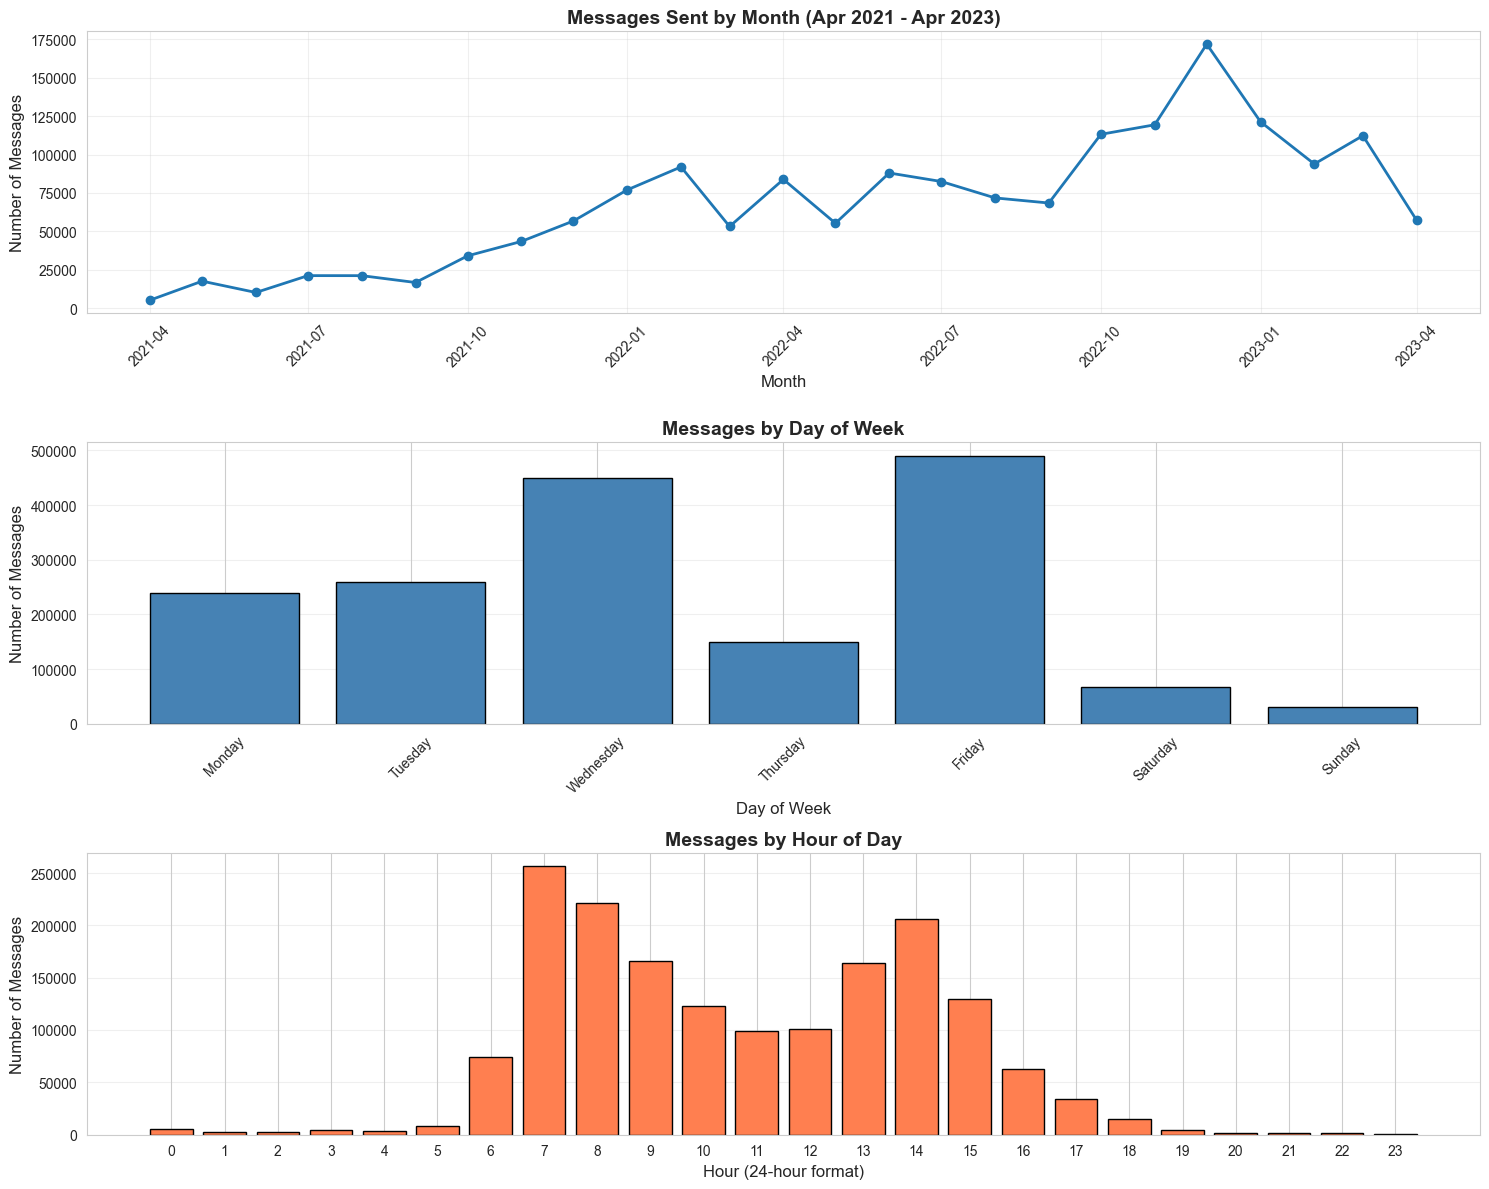

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TEMPORAL PATTERNS")
print("=" * 80)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Convert sent_at to datetime if needed and extract temporal features
df['sent_date'] = pd.to_datetime(df['sent_at']).dt.date
df['sent_hour'] = pd.to_datetime(df['sent_at']).dt.hour
df['sent_dayofweek'] = pd.to_datetime(df['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['sent_month'] = pd.to_datetime(df['sent_at']).dt.to_period('M')

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Messages by month (time series)
monthly_counts = df['sent_month'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convert Period to timestamp for plotting
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Messages Sent by Month (Apr 2021 - Apr 2023)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Messages', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Messages by day of week
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['sent_dayofweek'].dropna().value_counts().sort_index()
axes[1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='steelblue', edgecolor='black')
axes[1].set_title('Messages by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Number of Messages', fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Messages by hour
hour_counts = df['sent_hour'].dropna().value_counts().sort_index()
axes[2].bar(hour_counts.index, hour_counts.values, color='coral', edgecolor='black')
axes[2].set_title('Messages by Hour of Day', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hour (24-hour format)', fontsize=12)
axes[2].set_ylabel('Number of Messages', fontsize=12)
axes[2].set_xticks(range(0, 24))
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'temporal_patterns.png'")
plt.show()


In [8]:

# Print summary stats
# Print summary stats
print("\nSummary Statistics:")
print(f"Most active month: {monthly_counts.idxmax()} with {monthly_counts.max():,} messages")
print(f"Most active day: {dow_names[int(dow_counts.idxmax())]} with {dow_counts.max():,} messages")
print(f"Most active hour: {int(hour_counts.idxmax())}:00 with {hour_counts.max():,} messages")


Summary Statistics:
Most active month: 2022-12-01 00:00:00 with 171,942 messages
Most active day: Friday with 490,391 messages
Most active hour: 7:00 with 256,225 messages


Temporal patterns just for bulk campagin


TEMPORAL PATTERNS - BULK ONLY

✓ Plot saved as 'temporal_patterns_bulk.png'


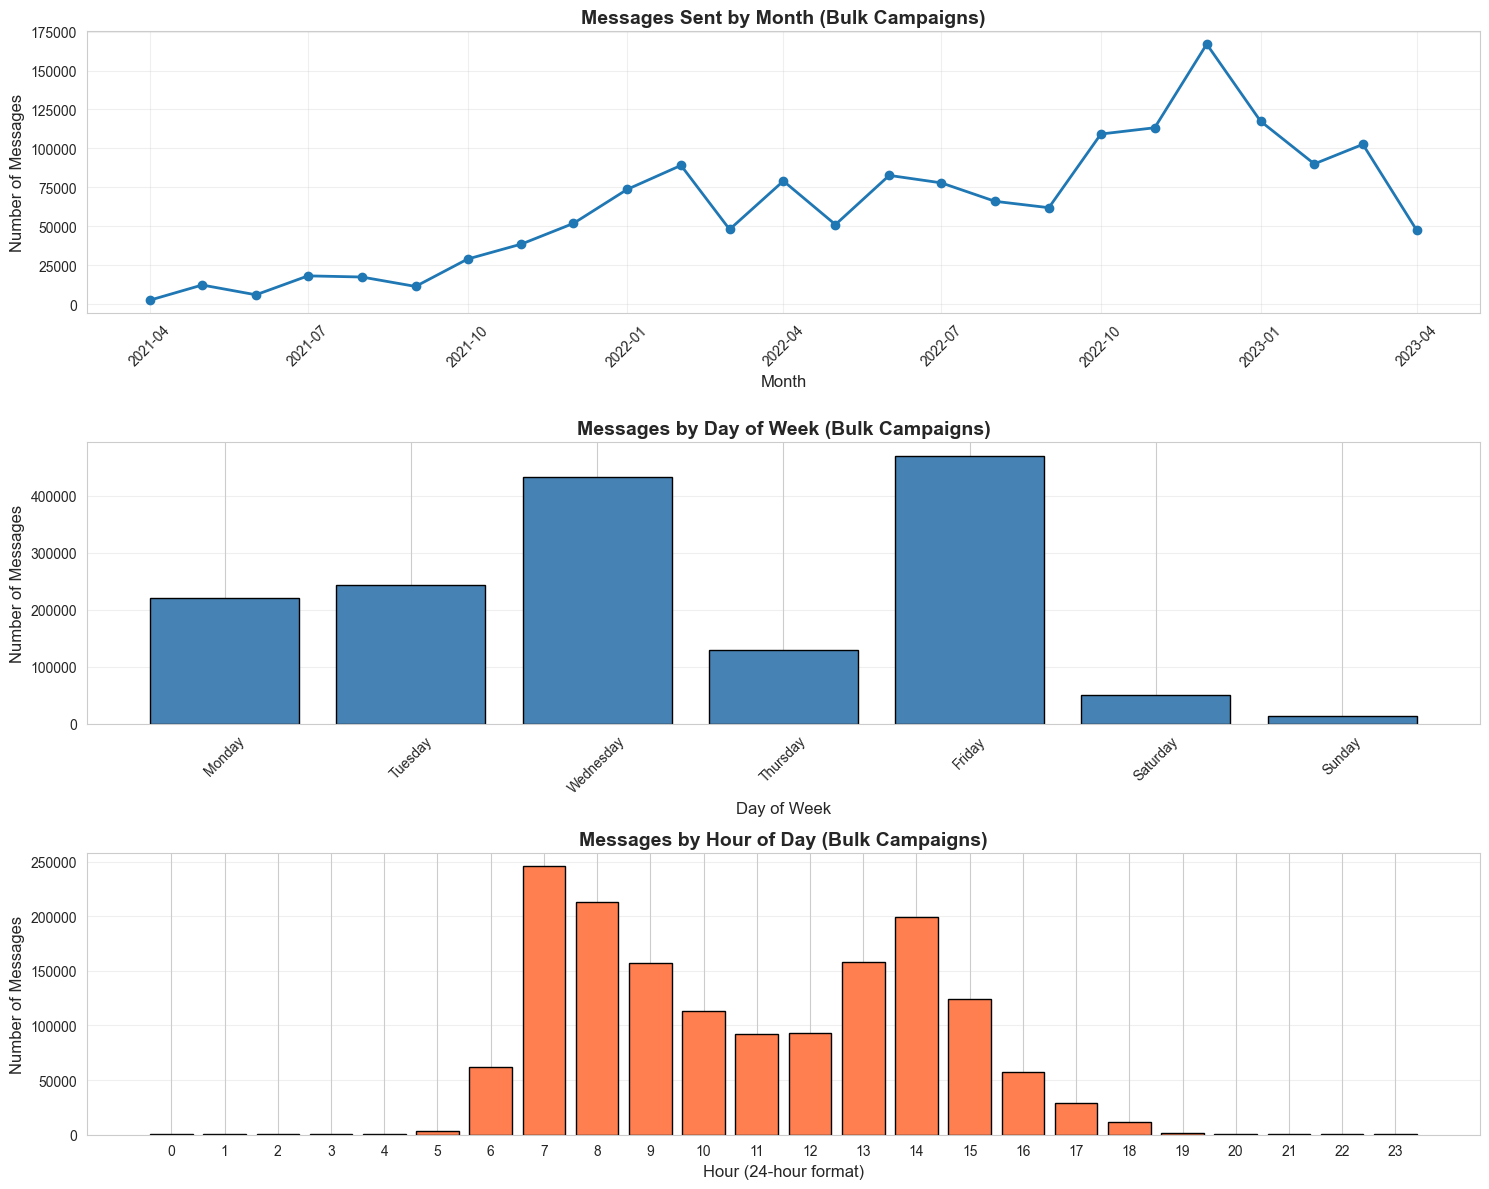

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TEMPORAL PATTERNS - BULK ONLY")
print("=" * 80)

# Filter to bulk campaigns
df_bulk = df[df['campaign_type'] == 'bulk'].copy()

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Convert sent_at to datetime if needed and extract temporal features
df_bulk['sent_date'] = pd.to_datetime(df_bulk['sent_at']).dt.date
df_bulk['sent_hour'] = pd.to_datetime(df_bulk['sent_at']).dt.hour
df_bulk['sent_dayofweek'] = pd.to_datetime(df_bulk['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df_bulk['sent_month'] = pd.to_datetime(df_bulk['sent_at']).dt.to_period('M')

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Messages by month (time series)
monthly_counts = df_bulk['sent_month'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convert Period to timestamp for plotting
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Messages Sent by Month (Bulk Campaigns)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Messages', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Messages by day of week
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df_bulk['sent_dayofweek'].dropna().value_counts().sort_index()
axes[1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='steelblue', edgecolor='black')
axes[1].set_title('Messages by Day of Week (Bulk Campaigns)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Number of Messages', fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Messages by hour
hour_counts = df_bulk['sent_hour'].dropna().value_counts().sort_index()
axes[2].bar(hour_counts.index, hour_counts.values, color='coral', edgecolor='black')
axes[2].set_title('Messages by Hour of Day (Bulk Campaigns)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hour (24-hour format)', fontsize=12)
axes[2].set_ylabel('Number of Messages', fontsize=12)
axes[2].set_xticks(range(0, 24))
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns_bulk.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'temporal_patterns_bulk.png'")
plt.show()


Looking at open, click and purchase rates (for all) by:
-Month/Year
-Month (unique)
-Day of Week
-Hour

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TIME TRENDS ANALYSIS")
print("=" * 80)

# Ensure datetime column exists
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# Monthly aggregation
print("Calculating monthly metrics...")
monthly = df.groupby(df['sent_datetime'].dt.to_period('M')).agg({
    'client_id': 'count',  # total messages
    'is_opened': ['sum', 'mean'],
    'is_clicked': ['sum', 'mean'],
    'is_purchased': ['sum', 'mean']
}).round(4)

monthly.columns = ['total_messages', 'opens', 'open_rate', 'clicks', 'click_rate', 
                   'purchases', 'purchase_rate']
monthly = monthly.reset_index()
monthly['sent_datetime'] = monthly['sent_datetime'].dt.to_timestamp()
monthly['open_rate'] *= 100
monthly['click_rate'] *= 100
monthly['purchase_rate'] *= 100

# Calculate CTOR (Click-to-Open Rate)
monthly['ctor'] = (monthly['clicks'] / monthly['opens'] * 100).round(2)

# Create clean 4-panel visualization
fig, axes = plt.subplots(4, 1, figsize=(16, 13))
fig.suptitle('Engagement Metrics Over Time (Apr 2021 - Apr 2023)', 
             fontsize=16, fontweight='bold')

# Define metrics
metrics = [
    ('open_rate', 'Open Rate (%)', 'total_messages', 'Messages Sent', 'steelblue'),
    ('click_rate', 'Click Rate (%)', 'total_messages', 'Messages Sent', 'coral'),
    ('purchase_rate', 'Purchase Rate (%)', 'total_messages', 'Messages Sent', 'green'),
    ('ctor', 'Click-to-Open Rate (%)', 'opens', 'Total Opens', 'purple')
]

for idx, (metric, label, volume_col, volume_label, color) in enumerate(metrics):
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Rate line (left axis)
    line = ax.plot(monthly['sent_datetime'], monthly[metric], 
                   marker='o', linewidth=2.5, markersize=5, color=color, 
                   label=label, zorder=3)
    ax.set_ylabel(label, color=color, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.grid(True, alpha=0.3, zorder=1)
    
    # Volume bars (right axis)
    bars = ax2.bar(monthly['sent_datetime'], monthly[volume_col], 
                   alpha=0.15, color='gray', width=20, zorder=2)
    ax2.set_ylabel(volume_label, color='gray', fontsize=11)
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # Add mean line
    mean_val = monthly[metric].mean()
    ax.axhline(y=mean_val, color=color, linestyle='--', alpha=0.4, linewidth=1.5)
    ax.text(monthly['sent_datetime'].iloc[-1], mean_val, 
            f' avg: {mean_val:.2f}%', va='center', fontsize=9, color=color)
    
    if idx == 3:
        ax.set_xlabel('Month', fontsize=12)

plt.tight_layout()
plt.savefig('time_trends_clean.png', dpi=150, bbox_inches='tight')
print("✓ Saved: time_trends_clean.png")
plt.close()

# Summary statistics
print("\n" + "=" * 80)
print("KEY TAKEAWAYS")
print("=" * 80)

print(f"\nOverall Period: {monthly['sent_datetime'].min().strftime('%b %Y')} to {monthly['sent_datetime'].max().strftime('%b %Y')}")
print(f"Total Messages: {monthly['total_messages'].sum():,}")
print(f"Avg Messages/Month: {monthly['total_messages'].mean():,.0f}")

print("\nAverage Engagement Rates:")
print(f"  Open Rate:           {monthly['open_rate'].mean():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].mean():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].mean():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].mean():.2f}%")

print("\nStability (Coefficient of Variation):")
print(f"  Open Rate:           {(monthly['open_rate'].std() / monthly['open_rate'].mean()):.2f}")
print(f"  Click Rate:          {(monthly['click_rate'].std() / monthly['click_rate'].mean()):.2f}")
print(f"  Purchase Rate:       {(monthly['purchase_rate'].std() / monthly['purchase_rate'].mean()):.2f}")
print(f"  Click-to-Open Rate:  {(monthly['ctor'].std() / monthly['ctor'].mean()):.2f}")

print("\nMonthly Range:")
print(f"  Open Rate:           {monthly['open_rate'].min():.2f}% to {monthly['open_rate'].max():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].min():.2f}% to {monthly['click_rate'].max():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].min():.2f}% to {monthly['purchase_rate'].max():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].min():.2f}% to {monthly['ctor'].max():.2f}%")

print("\nKey Insights:")
print(f"  → {monthly['opens'].sum():,} messages opened ({monthly['open_rate'].mean():.1f}% of sent)")
print(f"  → {monthly['clicks'].sum():,} clicks ({monthly['click_rate'].mean():.2f}% of sent, {monthly['ctor'].mean():.1f}% of opens)")
print(f"  → {monthly['purchases'].sum():,} purchases ({monthly['purchase_rate'].mean():.3f}% of sent)")

# Export summary table
monthly_export = monthly[['sent_datetime', 'total_messages', 'opens', 'clicks',
                          'open_rate', 'click_rate', 'purchase_rate', 'ctor']].copy()
monthly_export['sent_datetime'] = monthly_export['sent_datetime'].dt.strftime('%Y-%m')
monthly_export.columns = ['Month', 'Messages', 'Opens', 'Clicks', 
                          'Open_Rate_%', 'Click_Rate_%', 'Purchase_Rate_%', 'CTOR_%']
monthly_export.to_csv('monthly_engagement_summary.csv', index=False)
print("\n✓ Saved: monthly_engagement_summary.csv")


TIME TRENDS ANALYSIS
Calculating monthly metrics...
✓ Saved: time_trends_clean.png

KEY TAKEAWAYS

Overall Period: Apr 2021 to Apr 2023
Total Messages: 1,686,465
Avg Messages/Month: 67,459

Average Engagement Rates:
  Open Rate:           18.07%
  Click Rate:          1.47%
  Purchase Rate:       0.07%
  Click-to-Open Rate:  8.70%

Stability (Coefficient of Variation):
  Open Rate:           0.23
  Click Rate:          0.70
  Purchase Rate:       1.15
  Click-to-Open Rate:  0.74

Monthly Range:
  Open Rate:           8.21% to 23.78%
  Click Rate:          0.19% to 3.88%
  Purchase Rate:       0.00% to 0.29%
  Click-to-Open Rate:  1.45% to 22.17%

Key Insights:
  → 315,586 messages opened (18.1% of sent)
  → 17,827 clicks (1.47% of sent, 8.7% of opens)
  → 616 purchases (0.066% of sent)

✓ Saved: monthly_engagement_summary.csv


Repeating exact same time trends above just with bulk campaign messages only

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TIME TRENDS ANALYSIS - BULK ONLY")
print("=" * 80)

# Filter to bulk campaigns
df_bulk = df[df['campaign_type'] == 'bulk'].copy()

# Ensure datetime column exists
if 'sent_datetime' not in df_bulk.columns:
    df_bulk['sent_datetime'] = pd.to_datetime(df_bulk['sent_at'])

# Monthly aggregation
print("Calculating monthly metrics (bulk only)...")
monthly = df_bulk.groupby(df_bulk['sent_datetime'].dt.to_period('M')).agg({
    'client_id': 'count',  # total messages
    'is_opened': ['sum', 'mean'],
    'is_clicked': ['sum', 'mean'],
    'is_purchased': ['sum', 'mean']
}).round(4)

monthly.columns = [
    'total_messages', 'opens', 'open_rate',
    'clicks', 'click_rate', 'purchases', 'purchase_rate'
]

monthly = monthly.reset_index()
monthly['sent_datetime'] = monthly['sent_datetime'].dt.to_timestamp()
monthly['open_rate'] *= 100
monthly['click_rate'] *= 100
monthly['purchase_rate'] *= 100

# Calculate CTOR (Click-to-Open Rate)
monthly['ctor'] = (monthly['clicks'] / monthly['opens'] * 100).round(2)

# Create clean 4-panel visualization
fig, axes = plt.subplots(4, 1, figsize=(16, 13))
fig.suptitle(
    'Engagement Metrics Over Time - Bulk Campaigns (Apr 2021 - Apr 2023)',
    fontsize=16,
    fontweight='bold'
)

# Define metrics
metrics = [
    ('open_rate', 'Open Rate (%)', 'total_messages', 'Messages Sent', 'steelblue'),
    ('click_rate', 'Click Rate (%)', 'total_messages', 'Messages Sent', 'coral'),
    ('purchase_rate', 'Purchase Rate (%)', 'total_messages', 'Messages Sent', 'green'),
    ('ctor', 'Click-to-Open Rate (%)', 'opens', 'Total Opens', 'purple')
]

for idx, (metric, label, volume_col, volume_label, color) in enumerate(metrics):
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Rate line (left axis)
    line = ax.plot(
        monthly['sent_datetime'],
        monthly[metric],
        marker='o',
        linewidth=2.5,
        markersize=5,
        color=color,
        label=label,
        zorder=3
    )
    ax.set_ylabel(label, color=color, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.grid(True, alpha=0.3, zorder=1)
    
    # Volume bars (right axis)
    bars = ax2.bar(
        monthly['sent_datetime'],
        monthly[volume_col],
        alpha=0.15,
        color='gray',
        width=20,
        zorder=2
    )
    ax2.set_ylabel(volume_label, color='gray', fontsize=11)
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # Add mean line
    mean_val = monthly[metric].mean()
    ax.axhline(y=mean_val, color=color, linestyle='--', alpha=0.4, linewidth=1.5)
    ax.text(
        monthly['sent_datetime'].iloc[-1],
        mean_val,
        f' avg: {mean_val:.2f}%',
        va='center',
        fontsize=9,
        color=color
    )
    
    if idx == 3:
        ax.set_xlabel('Month', fontsize=12)

plt.tight_layout()
plt.savefig('time_trends_clean_bulk.png', dpi=150, bbox_inches='tight')
print("✓ Saved: time_trends_clean_bulk.png")
plt.close()

# Summary statistics
print("\n" + "=" * 80)
print("KEY TAKEAWAYS - BULK ONLY")
print("=" * 80)

print(f"\nOverall Period: {monthly['sent_datetime'].min().strftime('%b %Y')} "
      f"to {monthly['sent_datetime'].max().strftime('%b %Y')}")
print(f"Total Messages: {monthly['total_messages'].sum():,}")
print(f"Avg Messages/Month: {monthly['total_messages'].mean():,.0f}")

print("\nAverage Engagement Rates:")
print(f"  Open Rate:           {monthly['open_rate'].mean():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].mean():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].mean():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].mean():.2f}%")

print("\nStability (Coefficient of Variation):")
print(f"  Open Rate:           {(monthly['open_rate'].std() / monthly['open_rate'].mean()):.2f}")
print(f"  Click Rate:          {(monthly['click_rate'].std() / monthly['click_rate'].mean()):.2f}")
print(f"  Purchase Rate:       {(monthly['purchase_rate'].std() / monthly['purchase_rate'].mean()):.2f}")
print(f"  Click-to-Open Rate:  {(monthly['ctor'].std() / monthly['ctor'].mean()):.2f}")

print("\nMonthly Range:")
print(f"  Open Rate:           {monthly['open_rate'].min():.2f}% to {monthly['open_rate'].max():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].min():.2f}% to {monthly['click_rate'].max():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].min():.2f}% to {monthly['purchase_rate'].max():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].min():.2f}% to {monthly['ctor'].max():.2f}%")

print("\nKey Insights (Bulk):")
print(f"  → {monthly['opens'].sum():,} messages opened "
      f"({monthly['open_rate'].mean():.1f}% of sent)")
print(f"  → {monthly['clicks'].sum():,} clicks "
      f"({monthly['click_rate'].mean():.2f}% of sent, {monthly['ctor'].mean():.1f}% of opens)")
print(f"  → {monthly['purchases'].sum():,} purchases "
      f"({monthly['purchase_rate'].mean():.3f}% of sent)")

# Export summary table
monthly_export = monthly[[
    'sent_datetime', 'total_messages', 'opens', 'clicks',
    'open_rate', 'click_rate', 'purchase_rate', 'ctor'
]].copy()
monthly_export['sent_datetime'] = monthly_export['sent_datetime'].dt.strftime('%Y-%m')
monthly_export.columns = [
    'Month', 'Messages', 'Opens', 'Clicks',
    'Open_Rate_%', 'Click_Rate_%', 'Purchase_Rate_%', 'CTOR_%'
]
monthly_export.to_csv('monthly_engagement_summary_bulk.csv', index=False)
print("\n✓ Saved: monthly_engagement_summary_bulk.csv")



TIME TRENDS ANALYSIS - BULK ONLY
Calculating monthly metrics (bulk only)...
✓ Saved: time_trends_clean_bulk.png

KEY TAKEAWAYS - BULK ONLY

Overall Period: Apr 2021 to Apr 2023
Total Messages: 1,563,012
Avg Messages/Month: 62,520

Average Engagement Rates:
  Open Rate:           17.28%
  Click Rate:          1.18%
  Purchase Rate:       0.03%
  Click-to-Open Rate:  7.47%

Stability (Coefficient of Variation):
  Open Rate:           0.24
  Click Rate:          0.75
  Purchase Rate:       1.20
  Click-to-Open Rate:  0.80

Monthly Range:
  Open Rate:           7.78% to 22.86%
  Click Rate:          0.00% to 3.67%
  Purchase Rate:       0.00% to 0.13%
  Click-to-Open Rate:  0.00% to 21.06%

Key Insights (Bulk):
  → 281,524 messages opened (17.3% of sent)
  → 13,108 clicks (1.18% of sent, 7.5% of opens)
  → 261 purchases (0.030% of sent)

✓ Saved: monthly_engagement_summary_bulk.csv


Part II: Cohort analysis

Look at change in engagement rates over time for different cohorts based on
-When they joined
-When they first purchased
-Their lifetime engagement

In [21]:
import pandas as pd
import numpy as np

# ---- 0. Start from your existing df ----
# If you want bulk only, uncomment the next line instead:
# df = df[df['campaign_type'] == 'bulk'].copy()

df = df.copy()  # keep original safe

# Ensure datetime exists
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# ---- 1. Per-user lifetime metrics ----
per_user = df.groupby('client_id').agg(
    n_messages=('client_id', 'count'),
    opens=('is_opened', 'sum'),
    clicks=('is_clicked', 'sum'),
    purchases=('is_purchased', 'sum'),
)

per_user['open_rate'] = per_user['opens'] / per_user['n_messages']
per_user['click_rate'] = per_user['clicks'] / per_user['n_messages']
per_user['purchase_rate'] = per_user['purchases'] / per_user['n_messages']

# Engagement score (weights can be tweaked)
per_user['engagement_score'] = (
    0.4 * per_user['open_rate'] +
    0.4 * per_user['click_rate'] +
    0.2 * per_user['purchase_rate']
)

# Quantiles for low/medium/high
q_low = per_user['engagement_score'].quantile(1/3)
q_high = per_user['engagement_score'].quantile(2/3)

def label_engagement(score):
    if pd.isna(score):
        return 'unknown'
    if score <= q_low:
        return 'low'
    elif score <= q_high:
        return 'medium'
    else:
        return 'high'

per_user['lifetime_engagement_level'] = per_user['engagement_score'].apply(label_engagement)

print("per_user columns:", per_user.columns.tolist())
print(per_user[['n_messages', 'engagement_score', 'lifetime_engagement_level']].head())


per_user columns: ['n_messages', 'opens', 'clicks', 'purchases', 'open_rate', 'click_rate', 'purchase_rate', 'engagement_score', 'lifetime_engagement_level']
                     n_messages  engagement_score lifetime_engagement_level
client_id                                                                  
1515915625468061251          52          0.092308                      high
1515915625468062713         407          0.099263                      high
1515915625468066747         136          0.300000                      high
1515915625468069878         174          0.020690                    medium
1515915625468072645          11          0.000000                       low


In [23]:
# Add lifetime_engagement_level directly via map
df['lifetime_engagement_level'] = df['client_id'].map(
    per_user['lifetime_engagement_level']
)

print('Has lifetime_engagement_level in df?', 'lifetime_engagement_level' in df.columns)
print(df[['client_id', 'lifetime_engagement_level']].head())


Has lifetime_engagement_level in df? True
             client_id lifetime_engagement_level
0  1515915625489087633                    medium
1  1515915625489107288                      high
2  1515915625489112445                    medium
3  1515915625489122538                      high
4  1515915625489133634                      high


In [25]:
import matplotlib.pyplot as plt

# Make sure we have a datetime column
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# First message per user
df['first_message_datetime'] = df.groupby('client_id')['sent_datetime'].transform('min')

# Days since first message = lifetime axis
df['days_since_first_message'] = (
    df['sent_datetime'] - df['first_message_datetime']
).dt.days

# Optional: restrict to first N days of life
MAX_DAYS = 180
df_life = df[df['days_since_first_message'].between(0, MAX_DAYS)].copy()


In [26]:
metric_col = 'is_opened'          # or 'is_clicked', 'is_purchased'
metric_name = 'Open Rate (%)'     # update label if you change metric_col



LIFETIME ENGAGEMENT CURVES BY ENGAGEMENT LEVEL
✓ Saved: lifetime_engagement_by_level.png


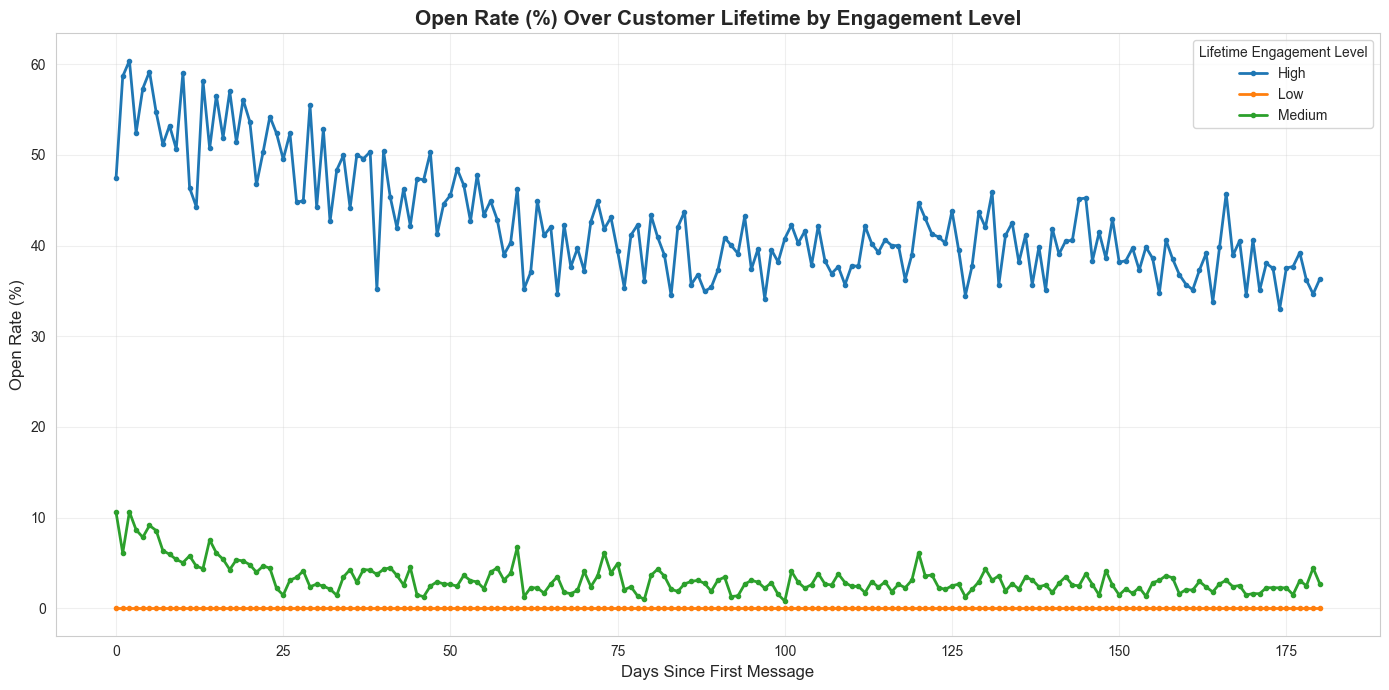


Average engagement in first 30 days by level:
lifetime_engagement_level
high      52.44
low        0.00
medium     5.49
Name: rate, dtype: float64


In [27]:
print("\n" + "=" * 80)
print("LIFETIME ENGAGEMENT CURVES BY ENGAGEMENT LEVEL")
print("=" * 80)

eng_by_level = (
    df_life
    .dropna(subset=['lifetime_engagement_level'])
    .groupby(['days_since_first_message', 'lifetime_engagement_level'])
    .agg(
        messages=('client_id', 'count'),
        engaged=(metric_col, 'sum')
    )
    .reset_index()
)

eng_by_level['rate'] = eng_by_level['engaged'] / eng_by_level['messages'] * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

for level, grp in eng_by_level.groupby('lifetime_engagement_level'):
    grp = grp.sort_values('days_since_first_message')
    ax.plot(
        grp['days_since_first_message'],
        grp['rate'],
        marker='o',
        linewidth=2,
        markersize=3,
        label=level.capitalize()
    )

ax.set_title(f'{metric_name} Over Customer Lifetime by Engagement Level',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Days Since First Message', fontsize=12)
ax.set_ylabel(metric_name, fontsize=12)
ax.legend(title='Lifetime Engagement Level')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lifetime_engagement_by_level.png', dpi=150, bbox_inches='tight')
print("✓ Saved: lifetime_engagement_by_level.png")
plt.show()

# Quick summary for first 30 days
summary_30 = (
    eng_by_level[eng_by_level['days_since_first_message'] <= 30]
    .groupby('lifetime_engagement_level')['rate']
    .mean()
    .round(2)
)
print("\nAverage engagement in first 30 days by level:")
print(summary_30)



LIFETIME ENGAGEMENT CURVES BY SIGNUP MONTH COHORT
✓ Saved: lifetime_engagement_by_signup_cohort.png


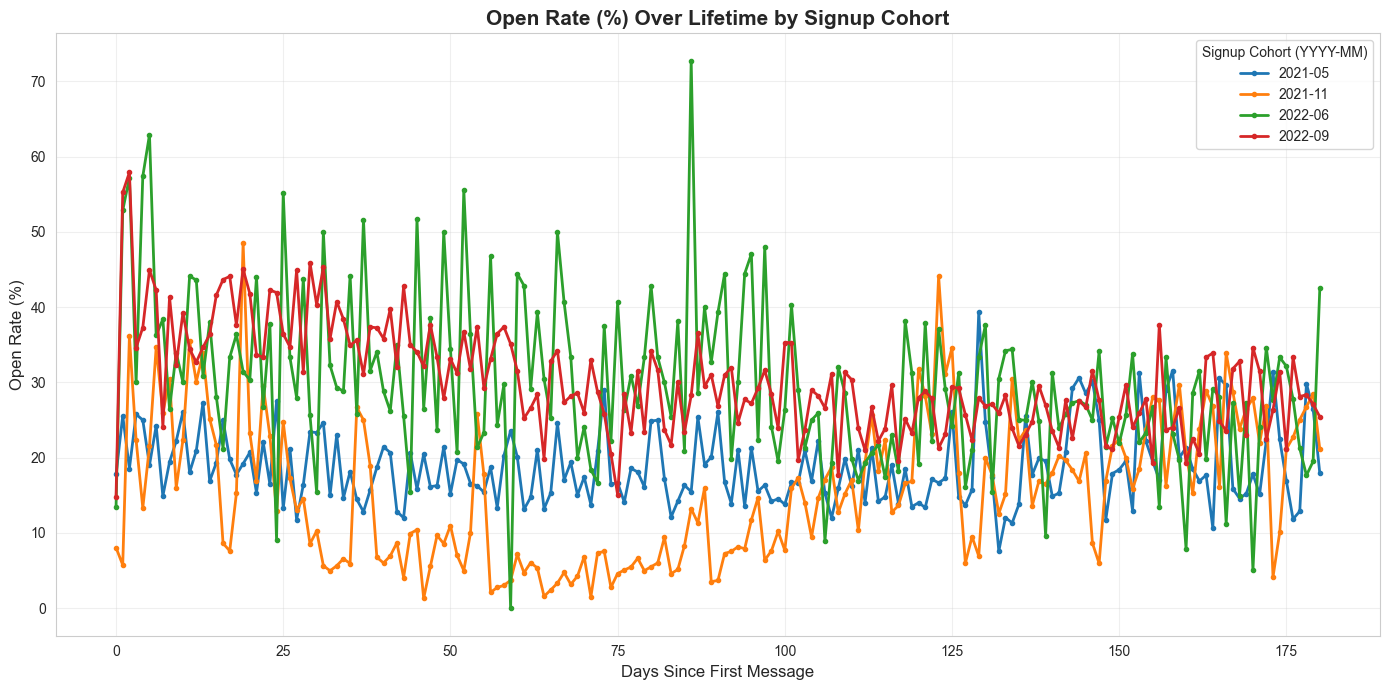


Average engagement in first 30 days by signup cohort:
signup_label
2022-09    38.73
2022-06    35.32
2021-11    21.19
2021-05    20.46
Name: rate, dtype: float64


In [28]:
print("\n" + "=" * 80)
print("LIFETIME ENGAGEMENT CURVES BY SIGNUP MONTH COHORT")
print("=" * 80)

# Keep rows that have signup_month
cohort_df = df_life.dropna(subset=['signup_month']).copy()
cohort_df['signup_label'] = cohort_df['signup_month'].dt.strftime('%Y-%m')

# Pick top 4 cohorts by user count
top_signup = (
    cohort_df
    .groupby('signup_label')['client_id']
    .nunique()
    .sort_values(ascending=False)
    .head(4)
    .index
)

cohort_df = cohort_df[cohort_df['signup_label'].isin(top_signup)]

eng_by_signup = (
    cohort_df
    .groupby(['days_since_first_message', 'signup_label'])
    .agg(
        messages=('client_id', 'count'),
        engaged=(metric_col, 'sum')
    )
    .reset_index()
)
eng_by_signup['rate'] = eng_by_signup['engaged'] / eng_by_signup['messages'] * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

for label, grp in eng_by_signup.groupby('signup_label'):
    grp = grp.sort_values('days_since_first_message')
    ax.plot(
        grp['days_since_first_message'],
        grp['rate'],
        marker='o',
        linewidth=2,
        markersize=3,
        label=label
    )

ax.set_title(f'{metric_name} Over Lifetime by Signup Cohort',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Days Since First Message', fontsize=12)
ax.set_ylabel(metric_name, fontsize=12)
ax.legend(title='Signup Cohort (YYYY-MM)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lifetime_engagement_by_signup_cohort.png', dpi=150, bbox_inches='tight')
print("✓ Saved: lifetime_engagement_by_signup_cohort.png")
plt.show()

# Summary: average engagement in first 30 days by cohort
summary_signup_30 = (
    eng_by_signup[eng_by_signup['days_since_first_message'] <= 30]
    .groupby('signup_label')['rate']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("\nAverage engagement in first 30 days by signup cohort:")
print(summary_signup_30)



LIFETIME ENGAGEMENT CURVES BY FIRST PURCHASE MONTH COHORT
✓ Saved: lifetime_engagement_by_first_purchase_cohort.png


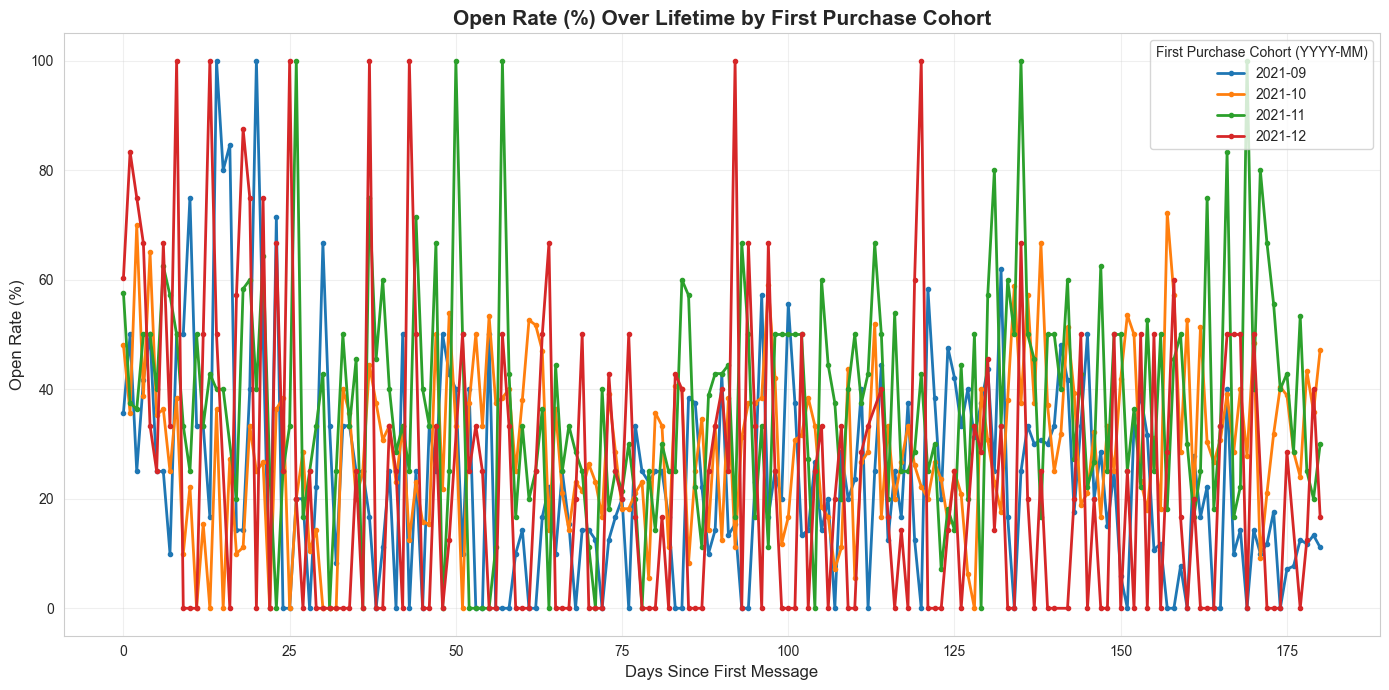


Average engagement in first 30 days by first purchase cohort:
first_purchase_label
2021-12    42.50
2021-11    41.65
2021-09    38.85
2021-10    24.46
Name: rate, dtype: float64


In [29]:
print("\n" + "=" * 80)
print("LIFETIME ENGAGEMENT CURVES BY FIRST PURCHASE MONTH COHORT")
print("=" * 80)

df_purchasers = df_life.dropna(subset=['first_purchase_month']).copy()
df_purchasers['first_purchase_label'] = df_purchasers['first_purchase_month'].dt.strftime('%Y-%m')

# Top 4 purchase cohorts by user count
top_fp = (
    df_purchasers
    .groupby('first_purchase_label')['client_id']
    .nunique()
    .sort_values(ascending=False)
    .head(4)
    .index
)

df_purchasers = df_purchasers[df_purchasers['first_purchase_label'].isin(top_fp)]

eng_by_fp = (
    df_purchasers
    .groupby(['days_since_first_message', 'first_purchase_label'])
    .agg(
        messages=('client_id', 'count'),
        engaged=(metric_col, 'sum')
    )
    .reset_index()
)
eng_by_fp['rate'] = eng_by_fp['engaged'] / eng_by_fp['messages'] * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

for label, grp in eng_by_fp.groupby('first_purchase_label'):
    grp = grp.sort_values('days_since_first_message')
    ax.plot(
        grp['days_since_first_message'],
        grp['rate'],
        marker='o',
        linewidth=2,
        markersize=3,
        label=label
    )

ax.set_title(f'{metric_name} Over Lifetime by First Purchase Cohort',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Days Since First Message', fontsize=12)
ax.set_ylabel(metric_name, fontsize=12)
ax.legend(title='First Purchase Cohort (YYYY-MM)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lifetime_engagement_by_first_purchase_cohort.png', dpi=150, bbox_inches='tight')
print("✓ Saved: lifetime_engagement_by_first_purchase_cohort.png")
plt.show()

# Summary: average engagement in first 30 days by purchase cohort
summary_fp_30 = (
    eng_by_fp[eng_by_fp['days_since_first_message'] <= 30]
    .groupby('first_purchase_label')['rate']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("\nAverage engagement in first 30 days by first purchase cohort:")
print(summary_fp_30)


Pt 3: engagement windows
-calculating open rate based on how many messages the users saw in the last 24 hrs, 3 days, 1 week

In [3]:
import pandas as pd

# Ensure datetime column
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# Sort so rolling is in time order within each client
df = df.sort_values(['client_id', 'sent_datetime'])


In [4]:
def add_message_history_features(group):
    # group is df for a single client
    g = group.set_index('sent_datetime')

    # Rolling counts over time windows; rolling includes current row, so we subtract 1
    last_24h = g['client_id'].rolling('24H').count() - 1
    last_3d  = g['client_id'].rolling('3D').count()  - 1
    last_7d  = g['client_id'].rolling('7D').count()  - 1

    group['messages_last_24hr'] = last_24h.to_numpy()
    group['messages_last_3days'] = last_3d.to_numpy()
    group['messages_last_week'] = last_7d.to_numpy()

    return group

df = df.groupby('client_id', group_keys=False).apply(add_message_history_features)


C:\Users\sffra\AppData\Local\Temp\ipykernel_39084\3653684736.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  last_24h = g['client_id'].rolling('24H').count() - 1


ValueError: index values must not have NaT